In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras.utils import to_categorical

In [6]:
cont_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways", "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm", "Horizontal_Distance_To_Fire_Points"]
cont_dict = {name: np.float64 for name in cont_names}

area_names = ["WArea_"+ str(i+1) for i in range(4)]
area_dict = {name: np.int64 for name in area_names}

soil_names = ['Soil_' + str(i+1) for i in range(40)]
soil_dict = {name: np.int64 for name in soil_names}

categ_names = area_names + soil_names

target = 'Cover_Type'
names = cont_names + categ_names #all columns except cover types
dtypes_dict = {**cont_dict, **area_dict, **soil_dict}

In [7]:
df = pd.read_csv("covtype.data", header = None, names = names + [target], dtype = dtypes_dict)

In [8]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

We will use what we have discovered during EDA. Thus we are dropping features that are not significant.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=123)

y_train = to_categorical(y_train.astype(int).to_numpy())
y_test = to_categorical(y_test.astype(int).to_numpy())

In [11]:
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Flatten())
model.add(Dense(8, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])

In [14]:
model_history = model.fit(x_train, y_train, 
                               validation_split=0.33, batch_size=1000, epochs=100)


Epoch 1/100
312/312 [==============================] - 3s 7ms/step - loss: 10.0100 - accuracy: 0.4697 - val_loss: 1.8928 - val_accuracy: 0.5485
Epoch 2/100
312/312 [==============================] - 2s 7ms/step - loss: 2.0343 - accuracy: 0.5455 - val_loss: 2.7285 - val_accuracy: 0.5177
Epoch 3/100
312/312 [==============================] - 2s 7ms/step - loss: 1.4194 - accuracy: 0.5918 - val_loss: 1.0547 - val_accuracy: 0.6091
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 1.2052 - accuracy: 0.6207 - val_loss: 1.3207 - val_accuracy: 0.5849
Epoch 5/100
312/312 [==============================] - 2s 5ms/step - loss: 1.0543 - accuracy: 0.6383 - val_loss: 2.1285 - val_accuracy: 0.4785
Epoch 6/100
312/312 [==============================] - 2s 5ms/step - loss: 0.9326 - accuracy: 0.6617 - val_loss: 0.9093 - val_accuracy: 0.6580
Epoch 7/100
312/312 [==============================] - 2s 5ms/step - loss: 0.8825 - accuracy: 0.6679 - val_loss: 0.7110 - val_accuracy: 0.703

Epoch 58/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4183 - accuracy: 0.8237 - val_loss: 0.4000 - val_accuracy: 0.8348
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4119 - accuracy: 0.8268 - val_loss: 0.4070 - val_accuracy: 0.8288
Epoch 60/100
312/312 [==============================] - 2s 7ms/step - loss: 0.4195 - accuracy: 0.8225 - val_loss: 0.4896 - val_accuracy: 0.7827
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4094 - accuracy: 0.8280 - val_loss: 0.4102 - val_accuracy: 0.8277
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4041 - accuracy: 0.8305 - val_loss: 0.4362 - val_accuracy: 0.8112
Epoch 63/100
312/312 [==============================] - 2s 7ms/step - loss: 0.4022 - accuracy: 0.8308 - val_loss: 0.3996 - val_accuracy: 0.8362
Epoch 64/100
312/312 [==============================] - 2s 7ms/step - loss: 0.4036 - accuracy: 0.8302 - val_loss: 0.4100 - val_accuracy:

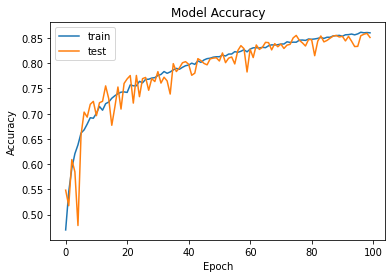

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

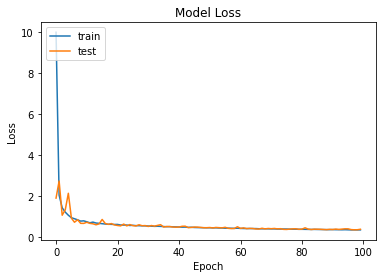

In [16]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
score = model.evaluate(x_test, y_test)
score

3632/3632 [==============================] - 5s 1ms/step - loss: 0.3703 - accuracy: 0.8484


[0.37025728821754456, 0.8483688235282898]

In [21]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3632/3632 [==============================] - 4s 1ms/step


array([1, 2, 1, ..., 1, 2, 1])

In [25]:
from sklearn.ensemble import ExtraTreesClassifier

etc_model = ExtraTreesClassifier(random_state = 53)
etc_model.fit(X,y)
etc_feature_importances = pd.DataFrame(etc_model.feature_importances_, index=X.columns,
                                      columns=['ETC']).sort_values('ETC', ascending=False)

In [26]:
etc_model = None
etc_feature_importances.head(10)

,ETC
Elevation,0.199053
Horizontal_Distance_To_Roadways,0.111130
Horizontal_Distance_To_Fire_Points,0.105355
Horizontal_Distance_To_Hydrology,0.064134
Vertical_Distance_To_Hydrology,0.058797
Aspect,0.052114
Hillshade_Noon,0.045301
Hillshade_9am,0.043331
Hillshade_3pm,0.042991
Slope,0.037128


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(random_state = 53)
gbc_model.fit(X,y)
gbc_feature_importances = pd.DataFrame(gbc_model.feature_importances_, index=X.columns,
                                      columns=['GBC']).sort_values('GBC', ascending=False)
gbc_model = None
gbc_feature_importances.head(10)

,GBC
Elevation,0.644757
Horizontal_Distance_To_Roadways,0.055174
Horizontal_Distance_To_Fire_Points,0.042101
Horizontal_Distance_To_Hydrology,0.038732
WArea_1,0.026833
Hillshade_Noon,0.025819
Soil_4,0.016962
Soil_22,0.016684
WArea_3,0.013669
Soil_2,0.012659


In [30]:
features_left = df[[
    'Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points',
    'WArea_4', 'Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
    'Aspect','Hillshade_3pm','Hillshade_Noon',
    'Hillshade_9am','Soil_28','Soil_18','Soil_19','Soil_20',
    'Soil_21','Soil_22',
    'Soil_10','Soil_3','Soil_30','Soil_4','Cover_Type'
]]


In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X = features_left.iloc[:,:-1]
y = features_left['Cover_Type']

In [32]:
X_scaled = scaler.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=53)

In [34]:
clf = ExtraTreesClassifier(n_estimators=50, random_state=53)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [35]:
def evaluate(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='RdPu')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report\n\n", clr)

Accuracy (Extra Trees Classifier with scaling): 94.49%


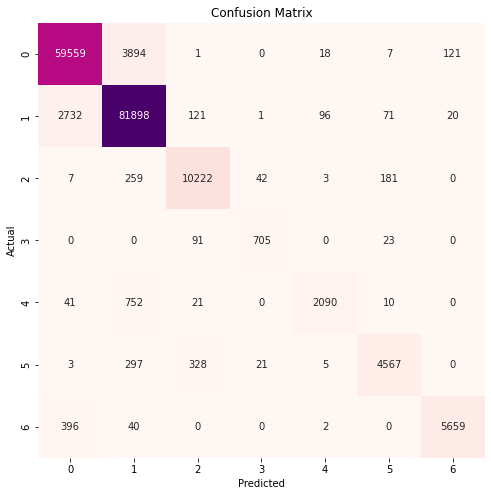

Classification Report

               precision    recall  f1-score   support

           1       0.95      0.94      0.94     63600
           2       0.94      0.96      0.95     84939
           3       0.95      0.95      0.95     10714
           4       0.92      0.86      0.89       819
           5       0.94      0.72      0.82      2914
           6       0.94      0.87      0.91      5221
           7       0.98      0.93      0.95      6097

    accuracy                           0.94    174304
   macro avg       0.94      0.89      0.92    174304
weighted avg       0.95      0.94      0.94    174304



In [36]:
evaluate(clf, "Extra Trees Classifier with scaling", X_test, y_test)

# Summary

Jest wiele sposobów na dokonanie klasyfikacji na tym zbiorze danych. Moim celem było przedstawienie możliwie jak największej ilości z nich, aby zobaczyć w jaki sposób wykorzystuje się funkcje dostępnych bibliotek. Bardziej niż na skupieniu się na znalezieniu jak najbardziej optymalnego rozwiązania skupiłam się na poznaniu różnych metod i technik jak undersampling, oversampling, skalowanie i dobieranie części parametrów czy następnie użycie metod ML a następnie przejścia do sieci neuronowych. 